In [2]:
# Clean Notebook
try:
    from IPython import get_ipython
    get_ipython().run_line_magic('clear', '')
    get_ipython().run_line_magic('reset', '-f')
except:
    pass

In [3]:
# Libraries: 

import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns 
import pandas as pd 
import numpy as np 


In [4]:
# Data: 

# -> Square_footage: Size of the house in ft^2
# -> Num_bedrooms: Number of bedrooms of the housse 
# -> Year_built: Año en que se construyó 
# -> Lot_size: Size of the lot the house is built in acres
# -> Garage_size: Numbers of cars that fit in 
# -> Neighboorhood quality: 
# -> House price

data = pd.read_csv('house_price_regression_dataset.csv')
data.head(20)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
5,3944,5,3,1990,2.475930,2,8,8.797970e+05
6,3671,1,2,2012,4.911960,0,1,8.144279e+05
7,3419,1,1,1972,2.805281,1,1,7.034131e+05
8,630,3,3,1997,1.014286,1,8,1.738750e+05
9,2185,4,2,1981,3.941604,2,5,5.041765e+05


In [5]:
data.shape

(1000, 8)

In [6]:
# Initial EDA: 
descriptive_stats = data.describe()
descriptive_stats

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [7]:
# Data Cleaning: 
null_counts = data.isnull().sum()
print("Null values on each column:\n", null_counts)

Null values on each column:
 Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64


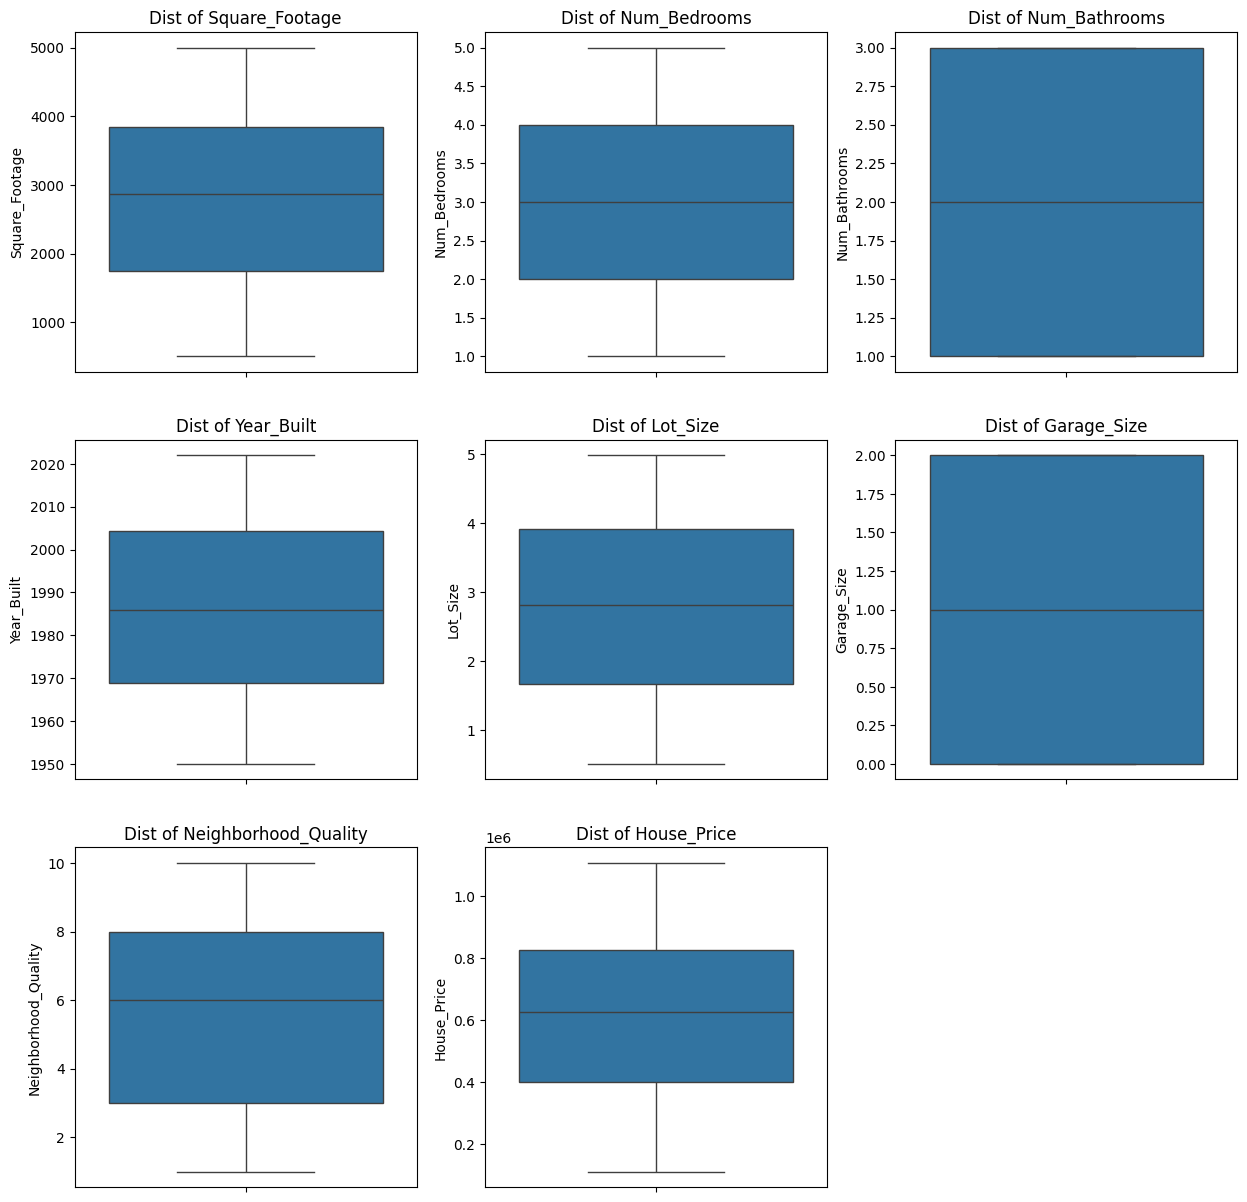

In [8]:
# Descriptive stats: 
# Box Plots -> To Detect important outliers
plt.figure(figsize=(15,15))
for i, column in enumerate(data.columns, 1):
    plt.subplot(3,3,i)
    sns.boxplot(y=data[column])
    plt.title(f'Dist of {column}')
    plt.tight_layout

plt.show()

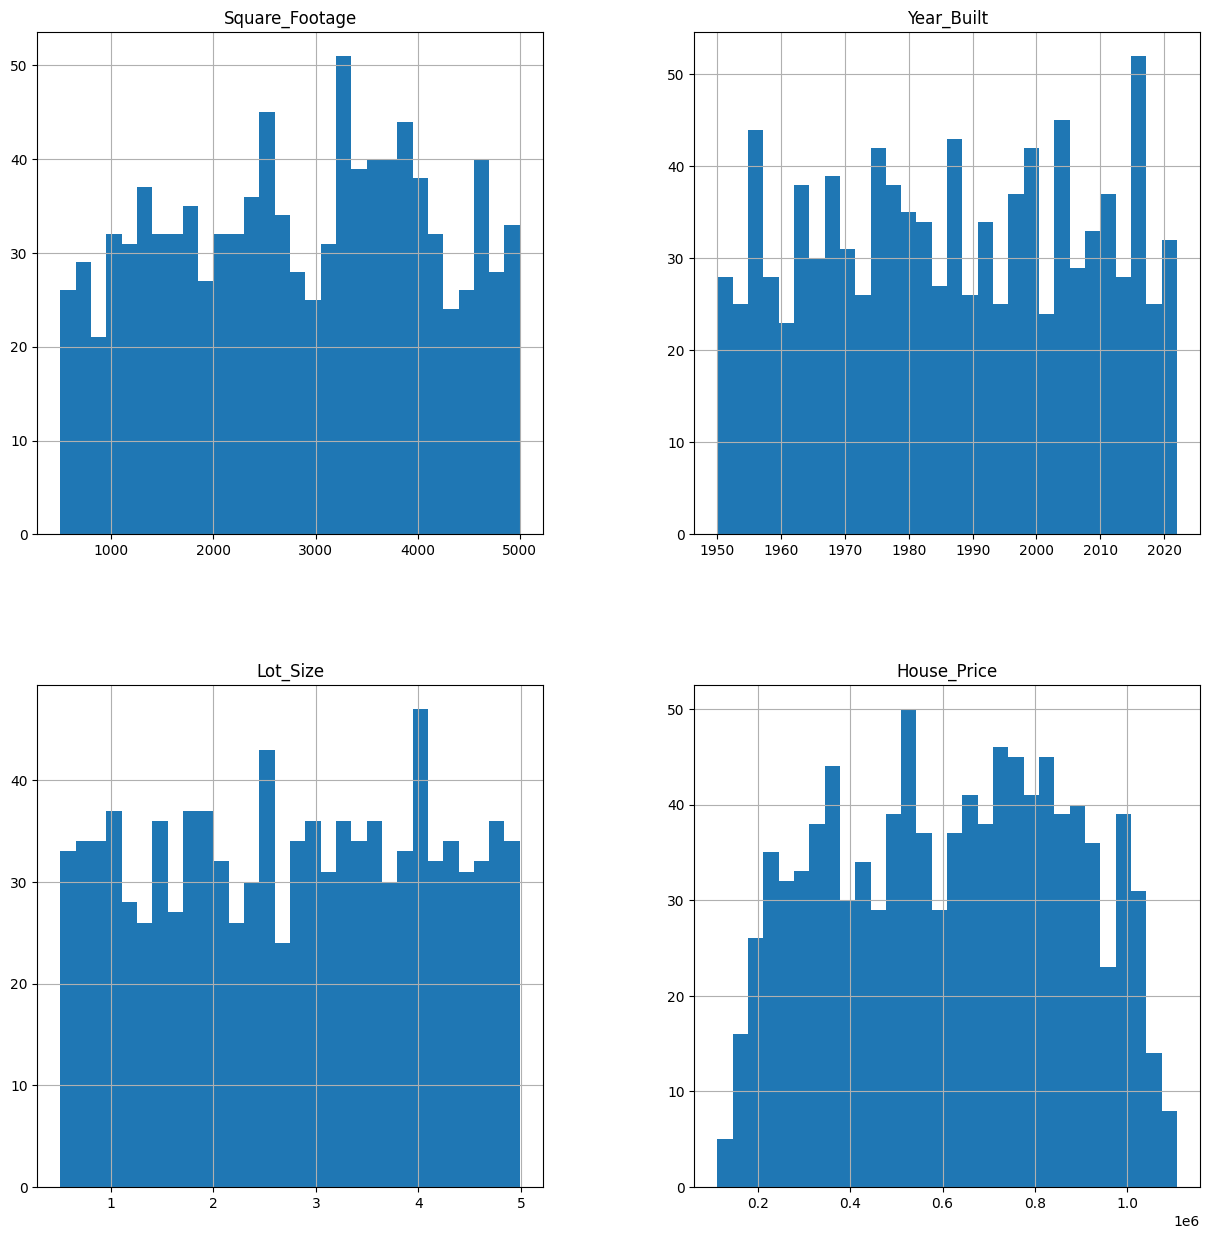

In [9]:
# Histograms: 
data_dist = data.drop(columns=['Num_Bedrooms', 'Num_Bathrooms', 'Garage_Size', 'Neighborhood_Quality'])


data_dist.hist(figsize=(15,15), bins=30)
plt.tight_layout
plt.show()

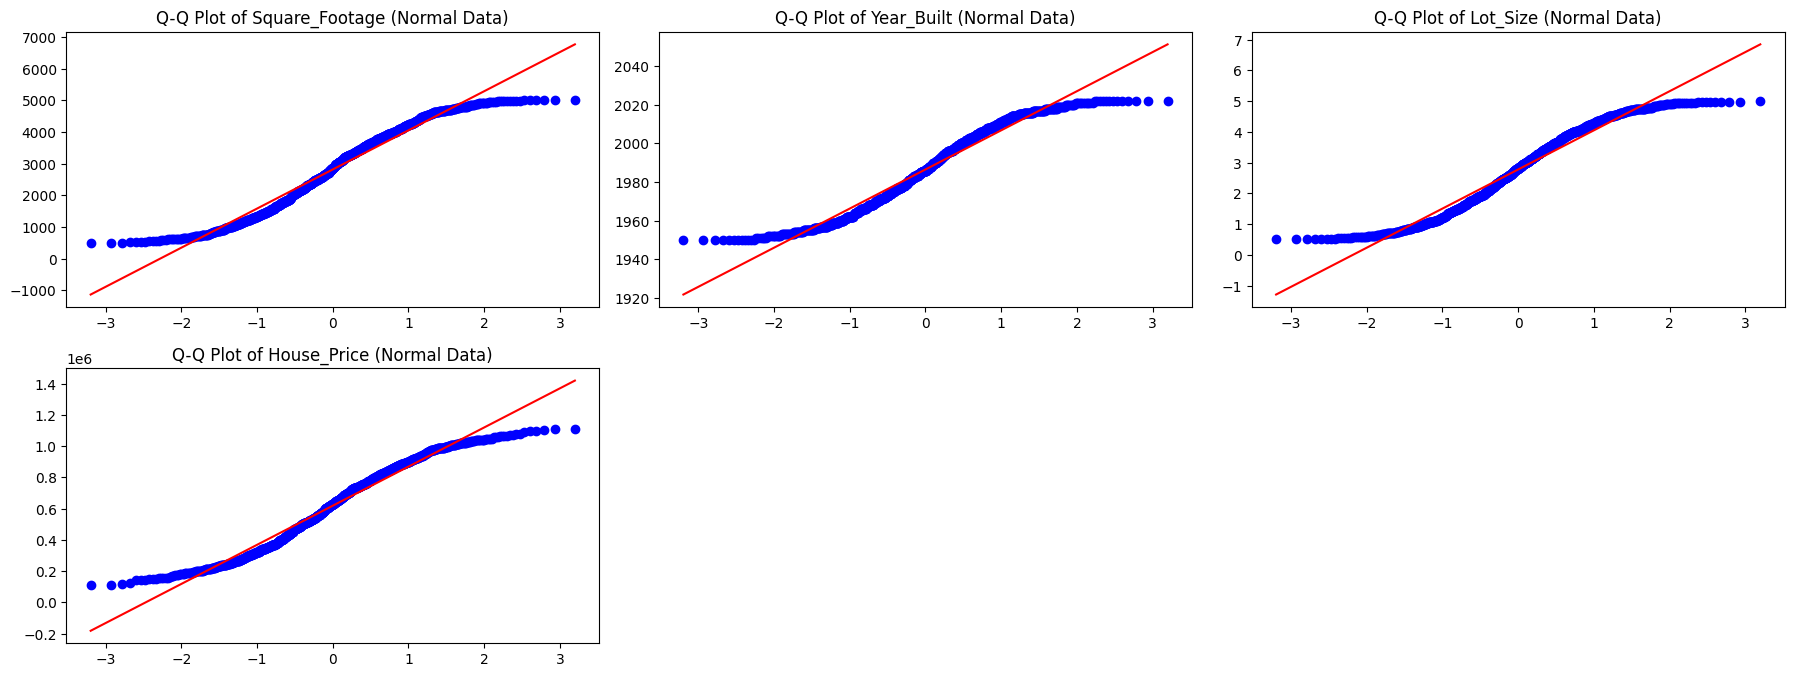

In [10]:
# QQ-Plots: 
def qq_plots(transformed_data, title): 
    plt.figure(figsize=(18,10))
    for i, column in enumerate(transformed_data.columns):
        plt.subplot(3, 3, i+1)
        stats.probplot(transformed_data[column], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of {column} ({title})')
        plt.xlabel('')
        plt.ylabel('')


    plt.tight_layout()
    plt.show()

qq_plots(data_dist, "Normal Data")

In [11]:
# Normality Tests: 

# 1. Shaphiro-Wilk 
from scipy.stats import shapiro
normality_results = {}
for column in data_dist:
    stat, p_value = shapiro(data_dist[column])
    normality_results[column] = {'Statistic': stat,
                                 'p-value': p_value,
                                 'Normal': p_value > 0.05}

normality_df = pd.DataFrame(normality_results).T
print(normality_df)

# Kolmogorov-Smirnov 
from scipy.stats import kstest, norm
ks_results = {}
for column in data_dist:
    stat, p_value = kstest(data_dist[column], 'norm', args=(data_dist[column].mean(), data_dist[column].std()))
    ks_results[column] = {'Statistic': stat, 'p-value': p_value, 'Normal': p_value>0.05}

ks_df = pd.DataFrame(ks_results).T
print(ks_df)

# to test -> anderson-darling | d'agostino-pearrson(k2)

               Statistic p-value Normal
Square_Footage  0.961728     0.0  False
Year_Built      0.956451     0.0  False
Lot_Size          0.9544     0.0  False
House_Price     0.967161     0.0  False
               Statistic   p-value Normal
Square_Footage  0.059021  0.001805  False
Year_Built      0.070012  0.000105  False
Lot_Size        0.065843  0.000326  False
House_Price     0.060845  0.001164  False


In [12]:
# Homocedasticity -> Barlett Test
from scipy.stats import bartlett

df = data 
barlett_results = {}

for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2: 
            stat, p_value = bartlett(df[col1].dropna(), df[col2].dropna())
            barlett_results[f'{col1} vs {col2}'] = {'stat': stat, 'p_value': p_value}

for comparison, results in barlett_results.items(): 
    print(f'{comparison} - Statistic: {results["stat"]}, p_value: {results["p_value"]}')

# Most of the comparisons show that p is aprox 0.0 -> heteroscedasticity
# Bathrooms vs Garage Size: Null hyptesis is rejected
# this implies that we need to use a models that don't assumme homocedasticty -> robust models   

Square_Footage vs Num_Bedrooms - Statistic: 12154.116354779213, p_value: 0.0
Square_Footage vs Num_Bathrooms - Statistic: 13260.484582567567, p_value: 0.0
Square_Footage vs Year_Built - Statistic: 6820.827615982497, p_value: 0.0
Square_Footage vs Lot_Size - Statistic: 12344.268783538271, p_value: 0.0
Square_Footage vs Garage_Size - Statistic: 13273.57347691027, p_value: 0.0
Square_Footage vs Neighborhood_Quality - Statistic: 10747.698542766864, p_value: 0.0
Square_Footage vs House_Price - Statistic: 9216.085044418227, p_value: 0.0
Num_Bedrooms vs Square_Footage - Statistic: 12154.116354779213, p_value: 0.0
Num_Bedrooms vs Num_Bathrooms - Statistic: 291.9698623695694, p_value: 1.8507427522346802e-65
Num_Bedrooms vs Year_Built - Statistic: 3959.147120580651, p_value: 0.0
Num_Bedrooms vs Lot_Size - Statistic: 9.039459180017205, p_value: 0.002642137895961045
Num_Bedrooms vs Garage_Size - Statistic: 298.59238839055536, p_value: 6.674902025650428e-67
Num_Bedrooms vs Neighborhood_Quality - St

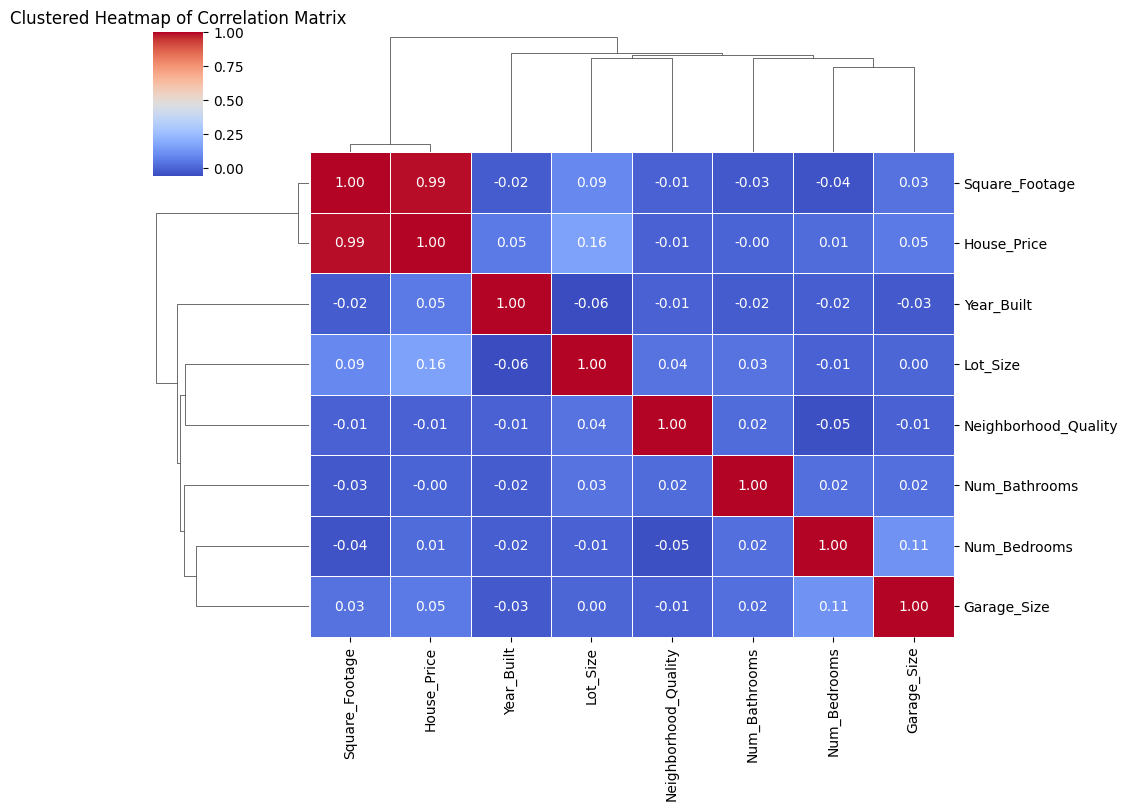

In [13]:
# Correlation Matrix:
# 
# Linear Corr:  
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidth=.5, figsize=(10,8))
plt.title('Clustered Heatmap of Correlation Matrix')
plt.show()


# We're gonna use: 
# -> Square footage 
# -> Lot size 
# -> Year Built 
# -> Garage size 

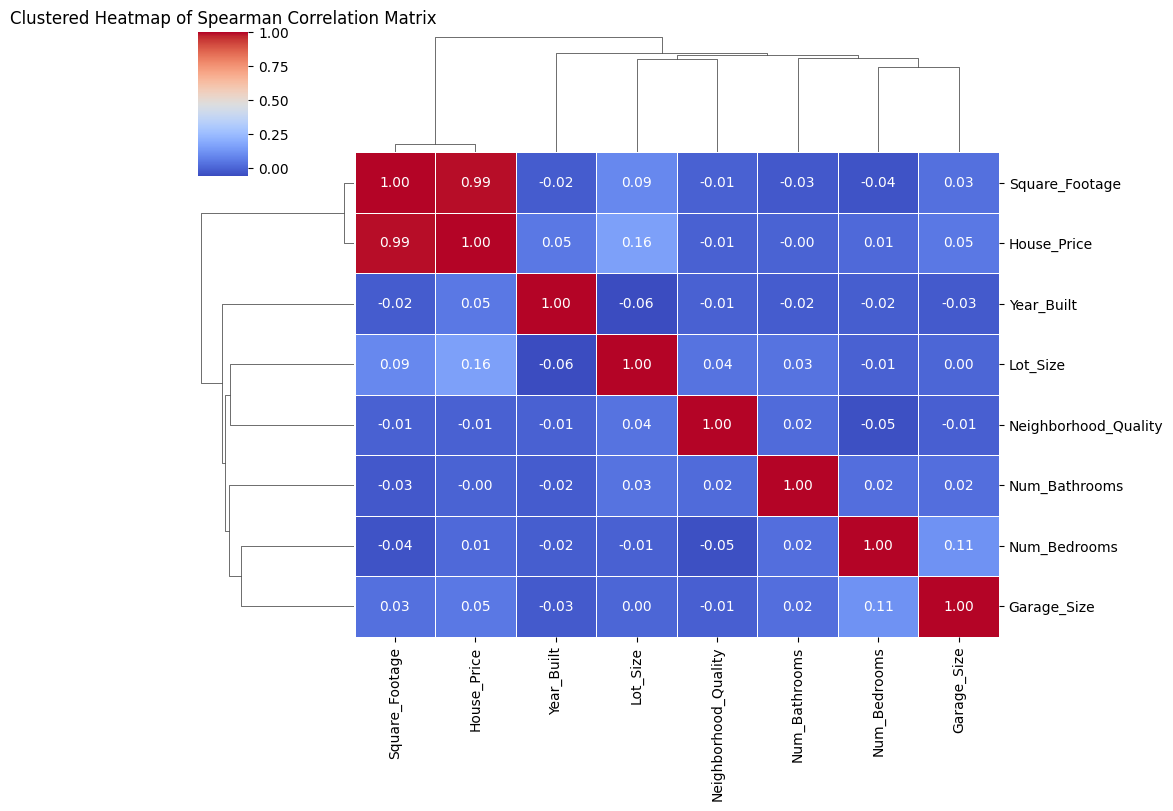

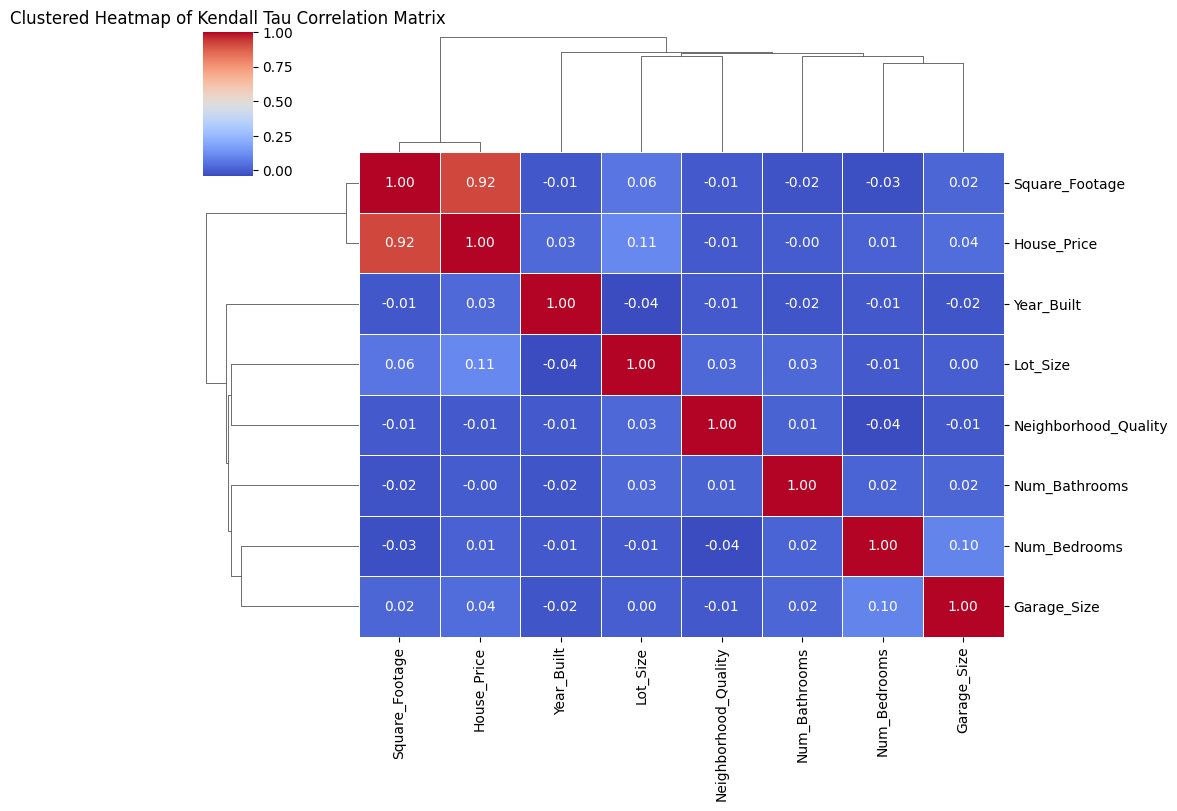

In [14]:
# Non Linear Corr: spearman and kendall 
from scipy.stats import spearmanr, kendalltau

# Empty matrices for spearman + kendall coef 
spearman_corr = pd.DataFrame(index=data.columns, columns=data.columns)
kendall_corr = pd.DataFrame(index=data.columns, columns=data.columns)

for col1 in data.columns: 
    for col2 in data.columns: 
        spearman_corr.loc[col1, col2], _ = spearmanr(data[col1], data[col2])
        kendall_corr.loc[col1,col2], _ = kendalltau(data[col1], data[col2])
    
# Clustermap para Spearman
sns.clustermap(spearman_corr.astype(float), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, figsize=(10, 8))
plt.title('Clustered Heatmap of Spearman Correlation Matrix')
plt.show()

# Clustermap para Kendall Tau
sns.clustermap(kendall_corr.astype(float), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, figsize=(10, 8))
plt.title('Clustered Heatmap of Kendall Tau Correlation Matrix')
plt.show()


In [15]:
# Vectorized Linear Regression from Scratch: 
# Based on: https://gist.github.com/akashjaswal/d175d1ef5d45c9cc4662d3e82e20bc96

class LinearReg:
    # Constructor 
     
    # 1. Feature vector (m,n) + bias (m, 1) 
    # 2. Output (y) -> (m, 1)
    # 3. Weight matrix -> Zeros matrix (num_features, 1)
    # 4. Grad descent: 
        # predict -> error -> loss -> gradient -> new params -> repeat 

    def __init__(self, lr = 0.1, iterations = 1000, 
                 normalize = True, fit_intercept=True):
        
        self.iterations = iterations
        self.lr = lr 
        self.normalize = normalize 
        self.fit_intercept = fit_intercept

    # Normalize -> Values between -1 to 1 
    def normalize_features(self, X: np.ndarray) -> np.ndarray: 
        return (X - np.mean(X, 0))/np.std(X,0)
    
    # Adjust X vector based on the needs of the user 
    def prepare_features(self, X: np.ndarray) -> np.ndarray: 
        if self.normalize:
            X = self.normalize_features(X)

        if self.fit_intercept:
            bias = np.ones(shape=(len(X), 1))
            X = np.append(bias, X, axis=1) # we append the bias as the 1st col 

        return X 
    
    # Initialize weights as 0 
    def init_weights(self, num_features: int) -> np.ndarray: 
        return np.zeros((num_features,1))

    def predict(self, W, features): 
        return np.dot(features, W) # dot product 
    
    def compute_error(self, y, y_pred): 
        return (y - y_pred)
    
    def compute_loss(self, error, num_samples): 
        return (1.0/num_samples)*np.sum(error**2)
    
    # Derivative of J with respect to theta: 
    def compute_gradients(self, features, error, num_samples): 
        return (-2.0/num_samples)*np.dot(features.T, error)
    
    def update_weights(self, W, gradients): 
        return W - self.lr*gradients
    
    def fit(self, X, y):
        y = np.array(y)
        y = y.reshape(len(y), 1)
        features = self.prepare_features(X)
        num_samples, num_features = features.shape
        W = self.init_weights(num_features)

        for i in range(self.iterations):
            y_pred = self.predict(W, features)
            error = self.compute_error(y, y_pred)
            loss = self.compute_loss(error, num_samples)
            gradients = self.compute_gradients(features, error, num_samples)
            W = self.update_weights(W, gradients)

        return W


In [16]:
data

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [17]:
# Split our dataset 
np.random.seed(42)

X = data.drop("House_Price", axis=1)  
y = data["House_Price"].values 

X.shape, y.shape

((1000, 7), (1000,))

In [18]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
29,2028,2,3,1967,1.784790,2,2
535,3519,5,3,1966,4.009947,0,10
695,4507,2,3,2014,4.122337,0,7
557,3371,4,2,2000,1.580318,0,1
836,2871,5,1,1974,3.426914,2,6


In [20]:
len(y_train)

800

In [21]:
X_test.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
521,4012,3,1,2016,2.098092,1,5
737,2310,3,1,1988,1.369622,1,4
740,4708,1,3,1962,1.792970,1,8
660,4932,2,1,1972,4.479598,1,2
411,3646,1,1,1994,3.980987,0,9


In [22]:
len(y_test)

200

In [23]:
# Model Training: 
model = LinearReg(lr=0.01, iterations=200, normalize=True, fit_intercept=True)

# Fit the model to the data
weights = model.fit(X, y)

In [24]:
print("Trained weights (parameters):")
print(weights)

Trained weights (parameters):
[[ 6.07976524e+05]
 [ 2.45833175e+05]
 [ 1.32942300e+04]
 [ 5.98930349e+03]
 [ 1.97244411e+04]
 [ 2.05830622e+04]
 [ 4.99154120e+03]
 [-1.08887072e+02]]


In [25]:
X_test_prepared = model.prepare_features(X_test)
y_pred = model.predict(weights, X_test_prepared)

In [26]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² in the test data: {r2}")

R² in the test data: 0.9951190936628659


In [27]:
import json

weights_dict = {
    "weights": weights.tolist()
}

with open("trained_weights.json", "w") as f: 
    json.dump(weights_dict, f)

print("weights saved to trained_weights.json")

weights saved to trained_weights.json
